In [1]:
import matplotlib
import pandas as pd
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os


import seaborn as sns
from matplotlib import rcParams

#绘图前的基本设置

myfont = fm.FontProperties(fname=r'C:\Windows\Fonts\Times New Roman.tiff') # 设置字体

# 设置matplotlib正常显示中文和负号

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
# matplotlib.rcParams['font.sans-serif']=['NSimSun']   # 用黑体显示中文
# matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号
matplotlib.rcParams['font.size'] = 18
# matplotlib.rcParams['font.family'] = 'sans-serif'  
matplotlib.rcParams['font.sans-serif'] = 'Times New Roman'  # NSimSun 新宋体字体   宋体：SimSuncss

%matplotlib inline  
#内嵌绘图，并且可以省略掉plt.show()这一步
# os.chdir(r'E:\BaiduSyncdisk\热浪博士论文\计算表格\Chapter3')


In [21]:
# 完整的老龄化率与人口暴露数据关联分析流程
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 加载数据
aging_rate_df = pd.read_excel(r'E:\BaiduSyncdisk\热浪博士论文\计算表格\Chapter5\老龄化率.xlsx')
exposure_df = pd.read_csv(r'E:\BaiduSyncdisk\Futureheatwave\data\exposure\Historical_Population_Exposure_by_year_province_age_exposure_sum.csv')

# 将老龄化率数据从宽格式转为长格式
aging_rate_long_df = aging_rate_df.melt(
    id_vars=['name'],
    value_vars=list(range(2001, 2020)),
    var_name='Year',
    value_name='Aging_Rate'
)

# 数据合并
merged_df = pd.merge(exposure_df, aging_rate_long_df,
                     left_on=['Province', 'Year'],
                     right_on=['name', 'Year'],
                     how='inner').drop(columns=['name'])

print(merged_df)


                                          system:index      Landscan  \
0    1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_2_000000...  7.576944e+04   
1    1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_2_000000...  2.464412e+04   
2    1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_2_000000...  1.433945e+05   
3    1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_2_000000...  2.213705e+04   
4    1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_2_000000...  1.829924e+04   
..                                                 ...           ...   
584                           1_2_0000000000000000001c  1.532342e+05   
585                           1_2_0000000000000000001d  1.059845e+06   
586                           1_2_00000000000000000005  1.124240e+06   
587                           1_2_00000000000000000009  8.475717e+05   
588                           1_2_0000000000000000000d  1.459008e+06   

            GPWv4      Worldpop       Globpop      Province  Year  \
0    7.227535e+04  7.395538e+04  7.432076e+04      Liaoning  2001 

In [22]:
# 计算整体人口暴露（暴露数据除以老龄化率）
merged_df['Landscan_total_exposure'] = merged_df['Landscan'] / merged_df['Aging_Rate']*3.5
merged_df['GPWv4_total_exposure'] = merged_df['GPWv4'] / merged_df['Aging_Rate']*3.5
merged_df['Worldpop_total_exposure'] = merged_df['Worldpop'] / merged_df['Aging_Rate']*3.5
merged_df['Globpop_total_exposure'] = merged_df['Globpop'] / merged_df['Aging_Rate']*3.5

# 检查处理后的数据
print(merged_df[['Province', 'Year', 'Landscan_total_exposure', 
                 'GPWv4_total_exposure', 'Worldpop_total_exposure', 
                 'Globpop_total_exposure']])
province_data =merged_df

         Province  Year  Landscan_total_exposure  GPWv4_total_exposure  \
0        Liaoning  2001             3.083585e+06          2.941386e+06   
1           Jilin  2001             1.372119e+06          1.360154e+06   
2    Heilongjiang  2001             8.310098e+06          7.736886e+06   
3         Qinghai  2001             1.578055e+06          1.561740e+06   
4         Ningxia  2001             1.317158e+06          1.428499e+06   
..            ...   ...                      ...                   ...   
584        Hainan  2019             5.754672e+06          6.517165e+06   
585     Guangdong  2019             4.323944e+07          4.517041e+07   
586         Hunan  2019             2.993713e+07          2.903258e+07   
587         Hubei  2019             2.269477e+07          2.128089e+07   
588         Henan  2019             4.401719e+07          4.279426e+07   

     Worldpop_total_exposure  Globpop_total_exposure  
0               3.009758e+06            3.024628e+06  
1

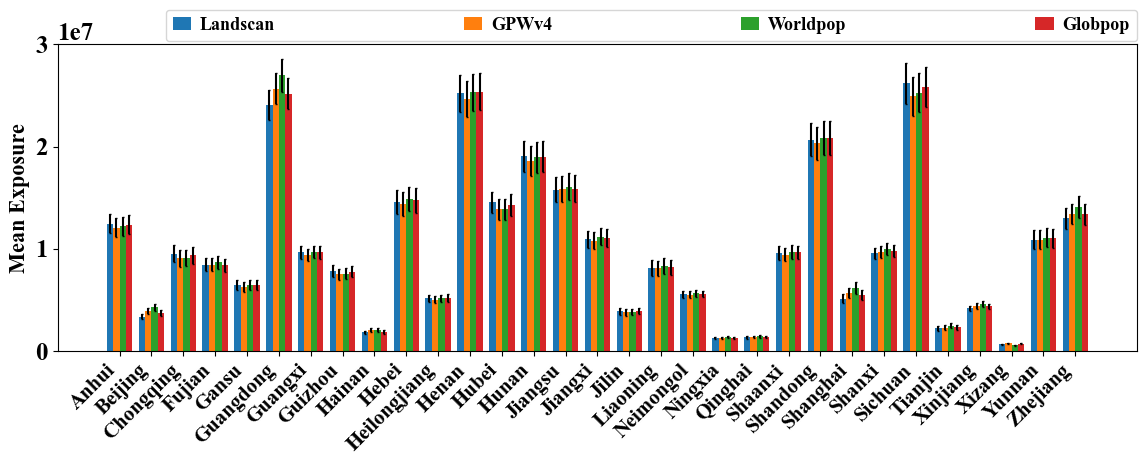

In [23]:
# 为每个省份计算各个数据源的均值和标准差
province_data = province_data.groupby('Province')[['Landscan_total_exposure', 
                 'GPWv4_total_exposure', 'Worldpop_total_exposure', 
                 'Globpop_total_exposure']].agg(['mean', 'std']).reset_index()

# 提取均值和标准差
mean_values = province_data.xs('mean', level=1, axis=1)
std_values = province_data.xs('std', level=1, axis=1)

# 绘制误差条图
import numpy as np
import matplotlib.pyplot as plt

# 设置X轴刻度位置和标签
x_pos = np.arange(len(province_data['Province']))

# 绘制误差条图
fig, ax = plt.subplots(figsize=(12, 5))
width = 0.2  # 每个条形的宽度

# 绘制每个数据源的误差条
ax.bar(x_pos - 1.5 * width, mean_values['Landscan_total_exposure'], width, yerr=std_values['Landscan_total_exposure']*0.1, label='Landscan', capsize=1)
ax.bar(x_pos - 0.5 * width, mean_values['GPWv4_total_exposure'], width, yerr=std_values['GPWv4_total_exposure']*0.1, label='GPWv4', capsize=1)
ax.bar(x_pos + 0.5 * width, mean_values['Worldpop_total_exposure'], width, yerr=std_values['Worldpop_total_exposure']*0.1, label='Worldpop', capsize=1)
ax.bar(x_pos + 1.5 * width, mean_values['Globpop_total_exposure'], width, yerr=std_values['Globpop_total_exposure']*0.1, label='Globpop', capsize=1)

# 设置标签和标题
ax.set_xticks(x_pos)
ax.set_xticklabels(province_data['Province'], rotation=45, ha='right', fontsize=15)
# ax.set_xlabel('Province', fontsize=12)
ax.set_ylabel('Mean Exposure', fontsize=16)
# ax.set_title('Mean Exposed Population with Error Bars by Different Data Sources', fontsize=14)
# 在左上角添加 (a)
# ax.text(0.02, -0.9, '(a)', size=16, weight='bold')
# 添加图例
# ax.legend(fontsize=15)
leg=plt.legend(fontsize=13,bbox_to_anchor=(0.1, 1.01, 0.9,0.1), loc='lower left',handletextpad=0.5,
                      ncol=10, mode="expand", borderaxespad=0.,handlelength=1)
# 展示图表
plt.tight_layout()
plt.savefig('E:\BaiduSyncdisk\热浪博士论文\论文图片\(a)人口敏感性分析.png', dpi=400, facecolor="none", transparent=True)
plt.show()